In [1]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requ

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, TrainerCallback, EarlyStoppingCallback
from datasets import Dataset, load_metric
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

# set environment as googledrive to folder "resource"
data_path =  "/resource/"

try:
    drive.mount('/content/drive')
    data_path = "/content/drive/My Drive/resource/"

except:
    print("You are not working in Colab at the moment :(")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv(data_path + 'output v11 updated v9.csv')

label_mapping = {
    "notr": 0,
    "positive": 1,
    "negative": 2,
    "positive|negative": 3,
}

# Etiketleri güncelle
df['label'] = df['value'].map({
    0: 'notr',
    1: 'positive',
    2: 'negative',
    3: 'positive|negative',
})

# Sadece gerekli sütunları tutun
df = df[['text', 'label']]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [7]:
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-turkish-128k-cased', do_lower_case=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/386 [00:00<?, ?B/s]

In [8]:
model = BertForSequenceClassification.from_pretrained(
    "dbmdz/bert-base-turkish-128k-cased",
    num_labels = len(label_mapping),
    output_attentions = False,
    output_hidden_states = False,
)

model.cuda()

pytorch_model.bin:   0%|          | 0.00/740M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-128k-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(128000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [9]:
from datasets import Dataset

# Dataset oluşturma
X_train = X_train.astype(str)
X_test = X_test.astype(str)

In [10]:
print(X_train.head())
print(X_test.head())

20772                    NFC özelliğinin mevcut olmadığını
57765    kartlarımdan hem yıllık hem aylık ücret kesimi...
60318    kapağını kapatınca yaklaşık 1-2 saat boyunca h...
26346        Klibin yönetmenliğini Şahin Toprak üstlendi .
28609    Ayrıca kırmızı ve beyaz olmak üzere iki adet ç...
Name: text, dtype: object
74084               4 aydır ürün değişecek diye bekliyorum
13053    Bir süre sonra Anglikan ruhban sınıfının tümü ...
56897                pisliğe ne zaman müdahale edeceksiniz
2686     Annesini ve dört kardeşini bırakarak ailesini ...
34164                        DSL ve İNTERNE ışığı yanmıyor
Name: text, dtype: object


In [11]:
train_dataset = Dataset.from_pandas(pd.DataFrame({'text': X_train, 'label': y_train}))
test_dataset = Dataset.from_pandas(pd.DataFrame({'text': X_test, 'label': y_test}))

In [12]:
def tokenize_function(examples):
    # Tokenize the text
    return tokenizer(examples['text'], padding='max_length', truncation=True)

# Apply the tokenization function
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/64745 [00:00<?, ? examples/s]

Map:   0%|          | 0/16187 [00:00<?, ? examples/s]

In [13]:
def add_labels(example):
    example['labels'] = label_mapping[example['label']]
    return example

train_dataset = train_dataset.map(add_labels)
test_dataset = test_dataset.map(add_labels)

# Remove the 'label' column since we now have 'labels'
train_dataset = train_dataset.remove_columns(['label'])
test_dataset = test_dataset.remove_columns(['label'])

# Set format for PyTorch
train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])


Map:   0%|          | 0/64745 [00:00<?, ? examples/s]

Map:   0%|          | 0/16187 [00:00<?, ? examples/s]

In [14]:
# Metrics calculation function
accuracy_metric = load_metric("accuracy")
f1_metric = load_metric("f1")

def compute_metrics(p):
    predictions, labels = p
    predictions = predictions.argmax(axis=1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average='weighted')
    return {"accuracy": accuracy['accuracy'], "f1": f1['f1']}

# Callback for logging metrics
class LoggingCallback(TrainerCallback):
    def __init__(self):
        self.epoch_train_loss = []
        self.epoch_val_loss = []
        self.epoch_acc = []
        self.epoch_f1 = []

    def on_epoch_end(self, args, state, control, **kwargs):
        # Record the training loss, handling cases where loss might not be logged
        if state.log_history:
            last_log = state.log_history[-1]
            if 'loss' in last_log:
                self.epoch_train_loss.append(last_log['loss'])
            else:
                self.epoch_train_loss.append(None)  # If no loss log, append None

    def on_evaluate(self, args, state, control, **kwargs):
        logs = kwargs['metrics']
        self.epoch_acc.append(logs['eval_accuracy'])
        self.epoch_f1.append(logs['eval_f1'])
        self.epoch_val_loss.append(logs['eval_loss'])

        # Print epoch results
        train_loss = self.epoch_train_loss[-1] if self.epoch_train_loss else 'N/A'
        print(f"Epoch {state.epoch}: Train Loss: {train_loss}, Val Loss: {logs['eval_loss']}, Accuracy: {logs['eval_accuracy']}, F1 Score: {logs['eval_f1']}")

        # Plotting accuracy, F1 score, train loss, and val loss
        epochs = list(range(1, len(self.epoch_acc) + 1))
        plt.figure(figsize=(24, 5))

        # Accuracy plot
        plt.subplot(1, 4, 1)
        plt.plot(epochs, self.epoch_acc, 'b', label='Accuracy', marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Accuracy per Epoch')
        plt.legend()

        # F1 score plot
        plt.subplot(1, 4, 2)
        plt.plot(epochs, self.epoch_f1, 'r', label='F1 Score', marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('F1 Score')
        plt.title('F1 Score per Epoch')
        plt.legend()

        # Train loss plot
        plt.subplot(1, 4, 3)
        valid_train_losses = [loss for loss in self.epoch_train_loss if loss is not None]
        if valid_train_losses:
            valid_epochs = list(range(1, len(valid_train_losses) + 1))  # Adjust epochs for valid losses
            plt.plot(valid_epochs, valid_train_losses, 'g', label='Train Loss', marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Train Loss')
        plt.title('Train Loss per Epoch')
        plt.legend()

        # Validation loss plot
        plt.subplot(1, 4, 4)
        plt.plot(epochs, self.epoch_val_loss, 'm', label='Validation Loss', marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Validation Loss')
        plt.title('Validation Loss per Epoch')
        plt.legend()

        plt.show()

<ipython-input-14-bd51ba4d2b4e>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy_metric = load_metric("accuracy")


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


The repository for f1 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/f1.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [18]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=24,  # Batch size'ı artırdık
    per_device_eval_batch_size=24,   # Batch size'ı artırdık
    num_train_epochs=2,              # Epoch sayısını artırdık
    weight_decay=0.01,
    learning_rate=1e-5,              # Öğrenme oranını düşürdük
    logging_dir='./logs',
    logging_steps=1000,
    fp16=True,
    report_to='none',
    save_total_limit=1,  # Yalnızca son checkpoint saklanacak
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [19]:
from transformers import AdamW, get_scheduler


# Trainer'ın optimizer ve learning rate scheduler'ını özelleştirme
optimizer = AdamW(model.parameters(), lr=training_args.learning_rate)
lr_scheduler = get_scheduler(
    name="linear",  # Linear scheduler kullanarak learning rate'i optimize edelim
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=training_args.num_train_epochs * len(train_dataset) // training_args.per_device_train_batch_size,
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.213100,0.200786,0.935380,0.934999
2,0.181700,0.200490,0.938222,0.938016


Epoch 1.0: Train Loss: 0.2131, Val Loss: 0.20078624784946442, Accuracy: 0.9353802434052017, F1 Score: 0.9349990606143267


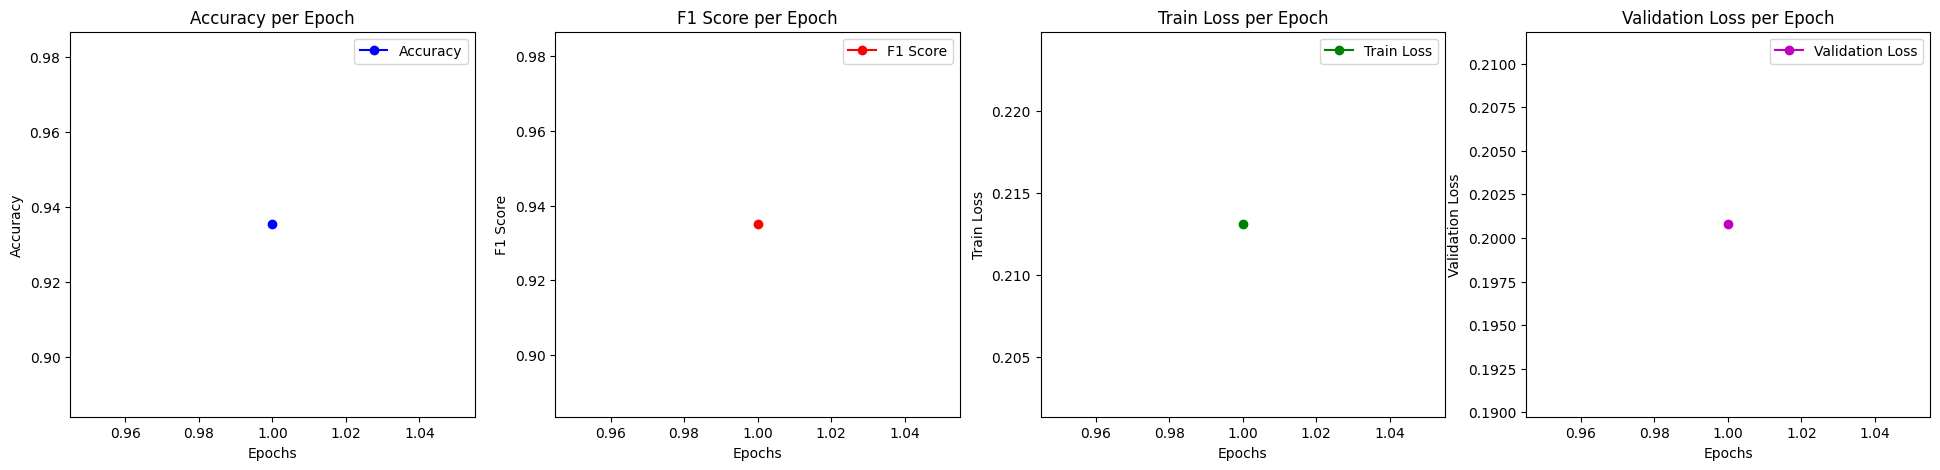

Epoch 2.0: Train Loss: 0.1817, Val Loss: 0.20049045979976654, Accuracy: 0.9382220300240934, F1 Score: 0.9380159183820019


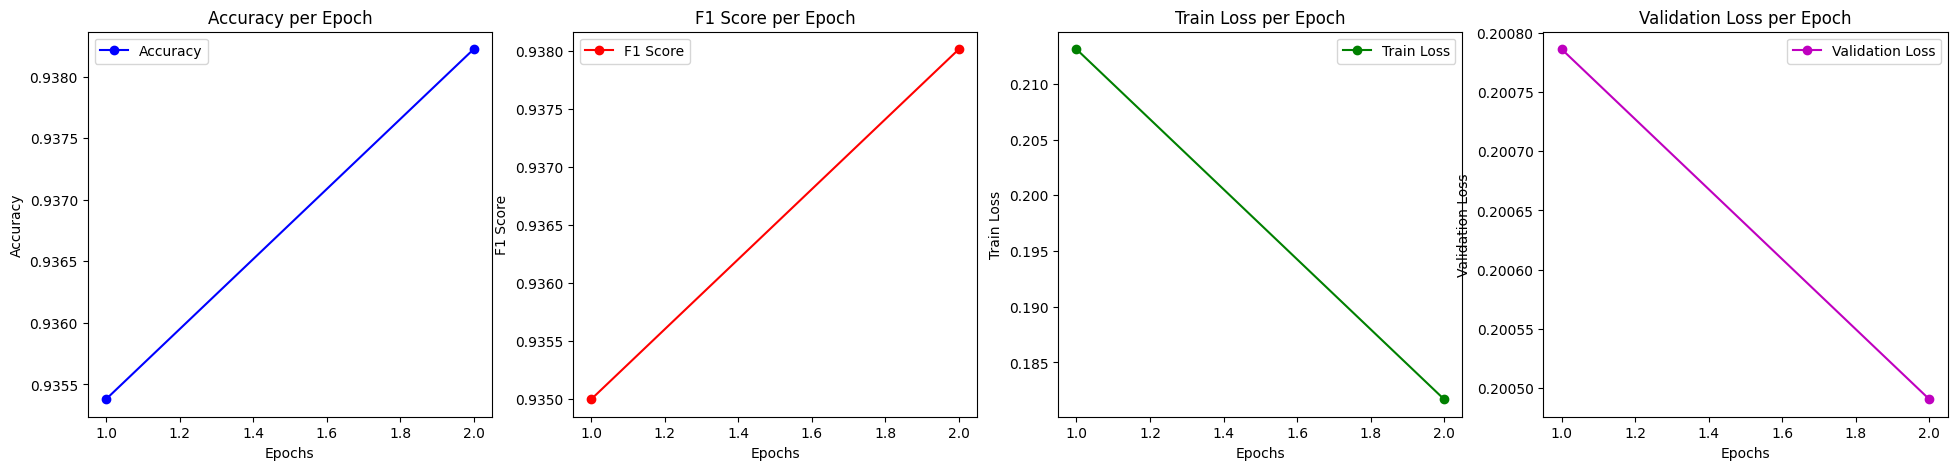

TrainOutput(global_step=5396, training_loss=0.20017175554257133, metrics={'train_runtime': 708.8511, 'train_samples_per_second': 182.676, 'train_steps_per_second': 7.612, 'total_flos': 3.407086236463104e+16, 'train_loss': 0.20017175554257133, 'epoch': 2.0})

In [20]:
logging_callback = LoggingCallback()

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    optimizers=(optimizer, lr_scheduler),  # Özelleştirilmiş optimizer ve scheduler ekleyin
    callbacks=[logging_callback]
)

trainer.train()

In [21]:
output_dir = './saved_model'

# Eğer output_dir yoksa oluşturun
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Modeli ve tokenizer'ı kaydet
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"Model ve tokenizer {output_dir} klasörüne kaydedildi.")

Model ve tokenizer ./saved_model klasörüne kaydedildi.


Epoch 2.0: Train Loss: 0.1817, Val Loss: 0.20049045979976654, Accuracy: 0.9382220300240934, F1 Score: 0.9380159183820019


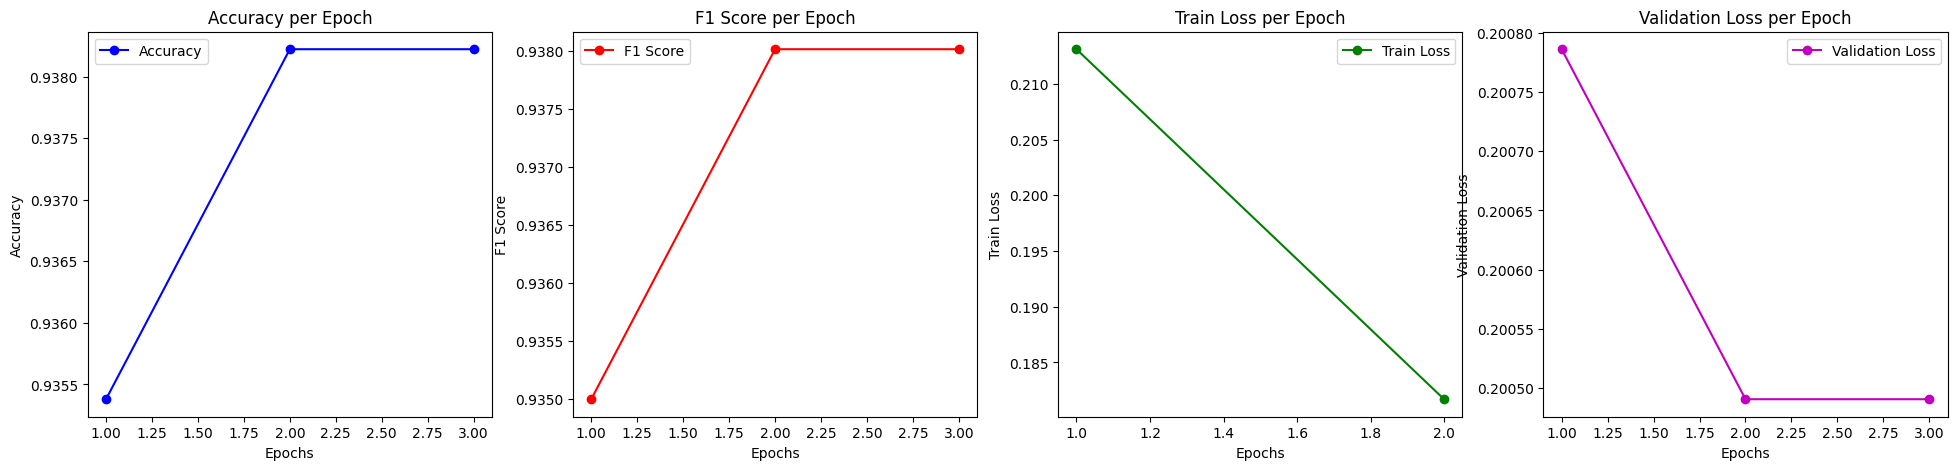

Evaluation results: {'eval_loss': 0.20049045979976654, 'eval_accuracy': 0.9382220300240934, 'eval_f1': 0.9380159183820019, 'eval_runtime': 22.1052, 'eval_samples_per_second': 732.27, 'eval_steps_per_second': 30.536, 'epoch': 2.0}


In [22]:
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

In [23]:
predictions = trainer.predict(test_dataset)

# Calculate accuracy
predictions_labels = predictions.predictions.argmax(-1)
accuracy = accuracy_metric.compute(predictions=predictions_labels, references=predictions.label_ids)
print(f"Accuracy: {accuracy['accuracy']}")

f1 = f1_metric.compute(predictions=predictions_labels, references=predictions.label_ids, average='weighted')
print(f"F1 Score: {f1['f1']}")

Accuracy: 0.9382220300240934
F1 Score: 0.9380159183820019


Validation Loss per Epoch:
[0.20078624784946442, 0.20049045979976654, 0.20049045979976654]
Accuracy per Epoch:
[0.9353802434052017, 0.9382220300240934, 0.9382220300240934]
F1 Score per Epoch:
[0.9349990606143267, 0.9380159183820019, 0.9380159183820019]

Metrics Table:
   Epoch  Validation Loss  Accuracy  F1 Score
0      1         0.200786  0.935380  0.934999
1      2         0.200490  0.938222  0.938016
2      3         0.200490  0.938222  0.938016


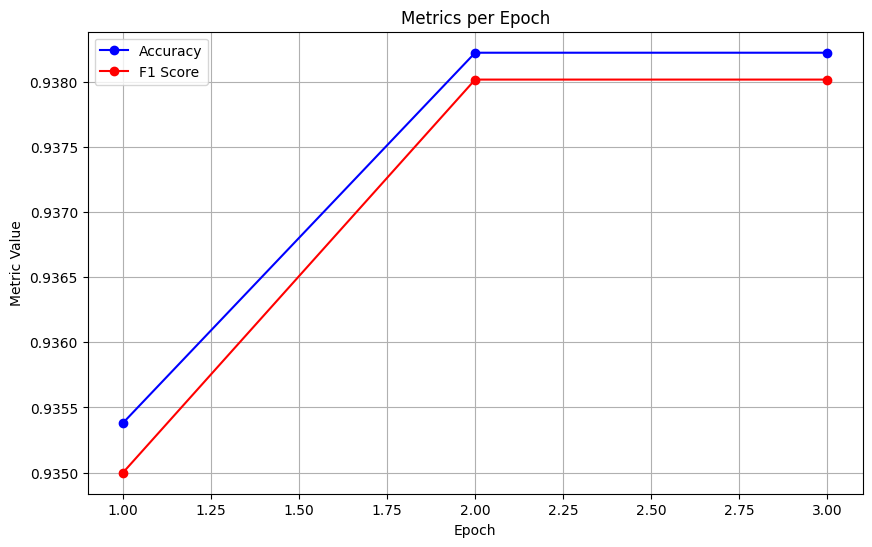

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Verileri basitçe göstermek için logging_callback'ı kullanın
print("Validation Loss per Epoch:")
print(logging_callback.epoch_val_loss)
print("Accuracy per Epoch:")
print(logging_callback.epoch_acc)
print("F1 Score per Epoch:")
print(logging_callback.epoch_f1)

# Tabloyu oluşturma
metrics_table = pd.DataFrame({
    "Epoch": list(range(1, len(logging_callback.epoch_acc) + 1)),
    "Validation Loss": logging_callback.epoch_val_loss,
    "Accuracy": logging_callback.epoch_acc,
    "F1 Score": logging_callback.epoch_f1,
})

print("\nMetrics Table:")
print(metrics_table)

# Grafik üzerinde gösterim
plt.figure(figsize=(10, 6))

# Validation Loss grafiği


# Accuracy grafiği
plt.plot(metrics_table["Epoch"], metrics_table["Accuracy"], marker='o', color='b', label='Accuracy')

# F1 Score grafiği
plt.plot(metrics_table["Epoch"], metrics_table["F1 Score"], marker='o', color='r', label='F1 Score')

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Metrics per Epoch')
plt.legend()
plt.grid(True)
plt.show()


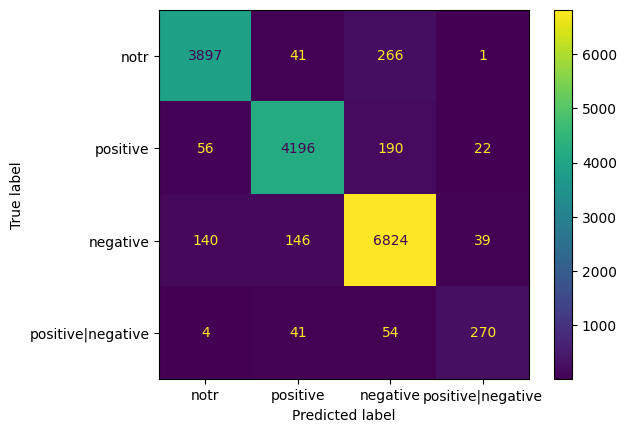

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Etiketler ve sayısal eşlemeler
label_mapping = {
    "notr": 0,
    "positive": 1,
    "negative": 2,
    "positive|negative": 3,
}

# Handle NaN values in y_test
y_test_cleaned = y_test.fillna("notr")  # NaN değerlerini "None" ile değiştir

# `y_test`'i uygun formata dönüştür
y_test_numeric = np.array([label_mapping.get(label, -1) for label in y_test_cleaned])

# `y_pred`'i uygun formata dönüştür
# Assuming `predictions.predictions` is in a format where you need to convert it to labels
y_pred = predictions.predictions.argmax(axis=1)
y_pred_numeric = np.array(y_pred)  # As the predictions are already numeric

# Confusion Matrix hesaplama
cm = confusion_matrix(y_test_numeric, y_pred_numeric, labels=list(label_mapping.values()))

# Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_mapping.keys()))

# Confusion Matrix grafiği
disp.plot(cmap=plt.cm.viridis)
plt.show()


Precision per class: [0.95118379 0.94846293 0.93046087 0.81325301]
Recall per class: [0.92675386 0.93996416 0.9545391  0.73170732]
F1 Score per class: [0.93880993 0.94419442 0.9423462  0.7703281 ]


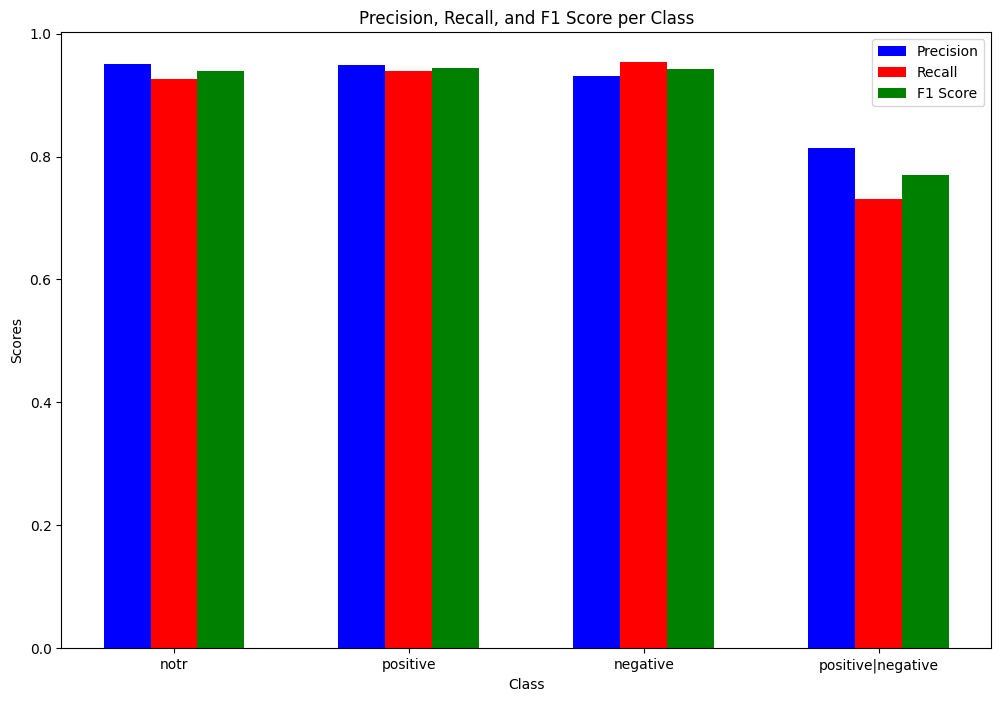

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

# Precision, Recall, F1 Score hesaplama
precision, recall, f1, _ = precision_recall_fscore_support(y_test_numeric, y_pred_numeric, labels=list(label_mapping.values()), average=None)

# Sonuçları yazdırma
print("Precision per class:", precision)
print("Recall per class:", recall)
print("F1 Score per class:", f1)

# Precision, Recall ve F1 Score grafiği
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
width = 0.2  # Bar genişliği
x = np.arange(len(label_mapping))  # Etiketlerin sayısı kadar

# Barlar
ax.bar(x - width, precision, width, label='Precision', color='b')
ax.bar(x, recall, width, label='Recall', color='r')
ax.bar(x + width, f1, width, label='F1 Score', color='g')

# Etiketler
ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score per Class')
ax.set_xticks(x)
ax.set_xticklabels(list(label_mapping.keys()))
ax.legend()


In [29]:
import torch

model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the GPU

# Etiketlerin ve sayısal eşlemelerin tanımlanması
label_mapping = {
    0: "None",
    1: "positive",
    2: "negative",
    3: "positive|negative",
}

def analyze_text(text):
    # Metni tokenize etme
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}  # Move input tensors to GPU

    # Model ile tahmin yapma
    with torch.no_grad():
        outputs = model(**inputs)

    # Tahmin edilen sınıfı alma
    predictions = torch.argmax(outputs.logits, dim=1).item()

    # Tahmin edilen etiketi dönüştürme
    predicted_label = label_mapping[predictions]

    return predicted_label

# Örnek metinlerin analizi
sample_texts = [
    "Bu ürünü çok beğendim, herkese tavsiye ederim.",
    "Ürün beklentilerimi karşılamadı, çok kötü.",
    "Kargo hızlı geldi ama kargo kırıktı :(",
    "Bu yemeğe bayıldım."
]

for text in sample_texts:
    result = analyze_text(text)
    print(f"Text: {text}\nPredicted Label: {result}\n")

Text: Bu ürünü çok beğendim, herkese tavsiye ederim.
Predicted Label: positive

Text: Ürün beklentilerimi karşılamadı, çok kötü.
Predicted Label: negative

Text: Kargo hızlı geldi ama kargo kırıktı :(
Predicted Label: positive|negative

Text: Bu yemeğe bayıldım.
Predicted Label: positive

